In [7]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import folium 
from folium.features import DivIcon
from urllib.request import urlopen
import json
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

In [4]:

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [6]:
old_pop = pd.read_csv('data/5대범죄 검거율_랭킹.csv', encoding='utf-8') #검거율높은곳이 1등

In [7]:
old_pop

,Unnamed: 0,지역구,년도,경찰관수,치안시설총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,...,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율,살인검거율,강간강제추행검거율,랭크
0,0,강남구,2018.0,1999.000000,29.333333,7512.333333,7.333333,13.000000,624.333333,3034.666667,...,527.000000,1346.333333,3301.000000,0.691618,1.038095,0.443703,0.861245,0.966667,0.844215,8
1,1,강동구,2018.0,1012.000000,21.333333,4064.666667,4.666667,10.666667,174.000000,1603.333333,...,155.666667,873.666667,1951.333333,0.736464,1.044444,0.543849,0.858642,1.011111,0.894949,15
2,2,강북구,2018.0,893.666667,18.666667,3556.000000,7.333333,5.666667,190.666667,1118.333333,...,144.333333,634.000000,2073.666667,0.806010,0.793651,0.569592,0.929038,0.916667,0.759175,24
3,3,강서구,2018.0,1242.666667,16.000000,4896.000000,10.000000,4.333333,297.000000,1887.333333,...,252.000000,1057.333333,2323.000000,0.744565,1.111111,0.561495,0.860778,0.981061,0.851667,17
4,4,관악구,2018.0,1194.000000,25.333333,5293.000000,10.000000,9.000000,379.666667,2071.333333,...,321.000000,1087.333333,2445.666667,0.731255,1.052381,0.526545,0.867577,0.881410,0.846599,14
5,5,광진구,2018.0,952.333333,16.000000,4190.666667,5.666667,7.000000,254.333333,1954.666667,...,201.666667,1050.000000,1703.333333,0.707459,0.649573,0.538107,0.864138,0.932540,0.793549,11
6,6,구로구,2018.0,1007.000000,21.333333,4804.000000,8.333333,6.666667,268.000000,1786.000000,...,175.666667,873.666667,2281.666667,0.696454,1.027778,0.488593,0.834489,1.014286,0.668639,9
7,7,금천구,2018.0,771.000000,16.000000,3221.000000,5.666667,7.333333,197.666667,1155.333333,...,174.333333,644.666667,1663.666667,0.773957,0.819048,0.558161,0.896767,1.000000,0.877288,21
8,8,노원구,2018.0,1087.333333,23.333333,4123.000000,4.333333,5.666667,186.000000,1486.000000,...,162.000000,674.333333,2066.666667,0.705895,0.925926,0.452732,0.846355,0.933333,0.870520,10
9,9,도봉구,2018.0,754.333333,12.000000,2119.333333,1.000000,4.333333,102.333333,734.666667,...,105.000000,414.000000,1084.666667,0.760371,0.866667,0.569786,0.849588,1.000000,1.021130,20


In [8]:
geo_path = ('data/seoul_municipalities_geo_simple.json')

get_str = json.load(open(geo_path, encoding='utf-8'))

In [9]:
seoul_map = folium.Map(location = [37.5502, 126.982],zoom_start = 10.5)

In [10]:
folium.Choropleth(
    geo_data = get_str,
    data = old_pop,
    columns = ['지역구', '랭크'],
    fill_color='OrRd_r',
    key_on='properties.name',
    ).add_to(seoul_map)


In [11]:
text = '동작구'
circle_lat = 37.5092
circle_lon = 126.967


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [12]:
text = '중구'
circle_lat = 37.5650
circle_lon = 126.999


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [13]:
text = '용산구'
circle_lat = 37.5450
circle_lon = 126.980


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [14]:
text = '성동구'
circle_lat = 37.5600
circle_lon = 127.040


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [15]:
text = '서초구'
circle_lat = 37.5000
circle_lon = 127.000


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [16]:
text = '강남구'
circle_lat = 37.5100
circle_lon = 127.050


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [17]:
text = '송파구'
circle_lat = 37.5100
circle_lon = 127.120


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [18]:
text = '강동구'
circle_lat = 37.5600
circle_lon = 127.140


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [19]:
text = '광진구'
circle_lat = 37.5600
circle_lon = 127.090


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [20]:
text = '중랑구'
circle_lat = 37.6050
circle_lon = 127.090


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [21]:
text = '노원구'
circle_lat = 37.6650
circle_lon = 127.075


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [22]:
text = '도봉구'
circle_lat = 37.6750
circle_lon = 127.033


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [23]:
text = '강북구'
circle_lat = 37.6650
circle_lon = 127.000


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [24]:
text = '성북구'
circle_lat = 37.6100
circle_lon = 127.020


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [25]:
text = '동대문구'
circle_lat = 37.5990
circle_lon = 127.060


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [26]:
text = '종로구'
circle_lat = 37.6100
circle_lon = 126.970


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [27]:
text = '은평구'
circle_lat = 37.6300
circle_lon = 126.930

folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [28]:
text = '서대문구'
circle_lat = 37.5930
circle_lon = 126.940


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [29]:
text = '마포구'
circle_lat = 37.5680
circle_lon = 126.910


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [30]:
text = '강서구'
circle_lat = 37.5700
circle_lon = 126.830


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [31]:
text = '양천구'
circle_lat = 37.5430
circle_lon = 126.872


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [32]:
text = '영등포구'
circle_lat = 37.5350
circle_lon = 126.905


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [33]:
text = '구로구'
circle_lat = 37.5080
circle_lon = 126.858


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [34]:
text = '금천구'
circle_lat = 37.4750
circle_lon = 126.895


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [35]:
text = '관악구'
circle_lat = 37.4800
circle_lon = 126.940


folium.map.Marker(
    [circle_lat, circle_lon],
    icon=DivIcon(
        icon_size=(10,6),
        icon_anchor=(0,0), 
        html='<div style="font-size: pt; font-weight:bold;">%s</div>' % text,
        )
    ).add_to(seoul_map)

In [36]:
seoul_map

In [37]:
seoul_map.save("population.html")

In [103]:
old_pop

,Unnamed: 0,지역구,년도,경찰관수,치안시설총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,...,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율,살인검거율,강간강제추행검거율,랭크
0,0,강남구,2018.0,1999.000000,29.333333,7512.333333,7.333333,13.000000,624.333333,3034.666667,...,527.000000,1346.333333,3301.000000,0.691618,1.038095,0.443703,0.861245,0.966667,0.844215,8
1,1,강동구,2018.0,1012.000000,21.333333,4064.666667,4.666667,10.666667,174.000000,1603.333333,...,155.666667,873.666667,1951.333333,0.736464,1.044444,0.543849,0.858642,1.011111,0.894949,15
2,2,강북구,2018.0,893.666667,18.666667,3556.000000,7.333333,5.666667,190.666667,1118.333333,...,144.333333,634.000000,2073.666667,0.806010,0.793651,0.569592,0.929038,0.916667,0.759175,24
3,3,강서구,2018.0,1242.666667,16.000000,4896.000000,10.000000,4.333333,297.000000,1887.333333,...,252.000000,1057.333333,2323.000000,0.744565,1.111111,0.561495,0.860778,0.981061,0.851667,17
4,4,관악구,2018.0,1194.000000,25.333333,5293.000000,10.000000,9.000000,379.666667,2071.333333,...,321.000000,1087.333333,2445.666667,0.731255,1.052381,0.526545,0.867577,0.881410,0.846599,14
5,5,광진구,2018.0,952.333333,16.000000,4190.666667,5.666667,7.000000,254.333333,1954.666667,...,201.666667,1050.000000,1703.333333,0.707459,0.649573,0.538107,0.864138,0.932540,0.793549,11
6,6,구로구,2018.0,1007.000000,21.333333,4804.000000,8.333333,6.666667,268.000000,1786.000000,...,175.666667,873.666667,2281.666667,0.696454,1.027778,0.488593,0.834489,1.014286,0.668639,9
7,7,금천구,2018.0,771.000000,16.000000,3221.000000,5.666667,7.333333,197.666667,1155.333333,...,174.333333,644.666667,1663.666667,0.773957,0.819048,0.558161,0.896767,1.000000,0.877288,21
8,8,노원구,2018.0,1087.333333,23.333333,4123.000000,4.333333,5.666667,186.000000,1486.000000,...,162.000000,674.333333,2066.666667,0.705895,0.925926,0.452732,0.846355,0.933333,0.870520,10
9,9,도봉구,2018.0,754.333333,12.000000,2119.333333,1.000000,4.333333,102.333333,734.666667,...,105.000000,414.000000,1084.666667,0.760371,0.866667,0.569786,0.849588,1.000000,1.021130,20


In [104]:
old_pop['년도'] = old_pop['년도'].apply(np.int64)

In [105]:
old_pop

,Unnamed: 0,지역구,년도,경찰관수,치안시설총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,...,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율,살인검거율,강간강제추행검거율,랭크
0,0,강남구,2018,1999.000000,29.333333,7512.333333,7.333333,13.000000,624.333333,3034.666667,...,527.000000,1346.333333,3301.000000,0.691618,1.038095,0.443703,0.861245,0.966667,0.844215,8
1,1,강동구,2018,1012.000000,21.333333,4064.666667,4.666667,10.666667,174.000000,1603.333333,...,155.666667,873.666667,1951.333333,0.736464,1.044444,0.543849,0.858642,1.011111,0.894949,15
2,2,강북구,2018,893.666667,18.666667,3556.000000,7.333333,5.666667,190.666667,1118.333333,...,144.333333,634.000000,2073.666667,0.806010,0.793651,0.569592,0.929038,0.916667,0.759175,24
3,3,강서구,2018,1242.666667,16.000000,4896.000000,10.000000,4.333333,297.000000,1887.333333,...,252.000000,1057.333333,2323.000000,0.744565,1.111111,0.561495,0.860778,0.981061,0.851667,17
4,4,관악구,2018,1194.000000,25.333333,5293.000000,10.000000,9.000000,379.666667,2071.333333,...,321.000000,1087.333333,2445.666667,0.731255,1.052381,0.526545,0.867577,0.881410,0.846599,14
5,5,광진구,2018,952.333333,16.000000,4190.666667,5.666667,7.000000,254.333333,1954.666667,...,201.666667,1050.000000,1703.333333,0.707459,0.649573,0.538107,0.864138,0.932540,0.793549,11
6,6,구로구,2018,1007.000000,21.333333,4804.000000,8.333333,6.666667,268.000000,1786.000000,...,175.666667,873.666667,2281.666667,0.696454,1.027778,0.488593,0.834489,1.014286,0.668639,9
7,7,금천구,2018,771.000000,16.000000,3221.000000,5.666667,7.333333,197.666667,1155.333333,...,174.333333,644.666667,1663.666667,0.773957,0.819048,0.558161,0.896767,1.000000,0.877288,21
8,8,노원구,2018,1087.333333,23.333333,4123.000000,4.333333,5.666667,186.000000,1486.000000,...,162.000000,674.333333,2066.666667,0.705895,0.925926,0.452732,0.846355,0.933333,0.870520,10
9,9,도봉구,2018,754.333333,12.000000,2119.333333,1.000000,4.333333,102.333333,734.666667,...,105.000000,414.000000,1084.666667,0.760371,0.866667,0.569786,0.849588,1.000000,1.021130,20


In [106]:
old_pop=old_pop.drop(columns=['Unnamed: 0'], axis=1)

In [107]:
old_pop

,지역구,년도,경찰관수,치안시설총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,...,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율,살인검거율,강간강제추행검거율,랭크
0,강남구,2018,1999.000000,29.333333,7512.333333,7.333333,13.000000,624.333333,3034.666667,3833.000000,...,527.000000,1346.333333,3301.000000,0.691618,1.038095,0.443703,0.861245,0.966667,0.844215,8
1,강동구,2018,1012.000000,21.333333,4064.666667,4.666667,10.666667,174.000000,1603.333333,2272.000000,...,155.666667,873.666667,1951.333333,0.736464,1.044444,0.543849,0.858642,1.011111,0.894949,15
2,강북구,2018,893.666667,18.666667,3556.000000,7.333333,5.666667,190.666667,1118.333333,2234.000000,...,144.333333,634.000000,2073.666667,0.806010,0.793651,0.569592,0.929038,0.916667,0.759175,24
3,강서구,2018,1242.666667,16.000000,4896.000000,10.000000,4.333333,297.000000,1887.333333,2697.333333,...,252.000000,1057.333333,2323.000000,0.744565,1.111111,0.561495,0.860778,0.981061,0.851667,17
4,관악구,2018,1194.000000,25.333333,5293.000000,10.000000,9.000000,379.666667,2071.333333,2823.000000,...,321.000000,1087.333333,2445.666667,0.731255,1.052381,0.526545,0.867577,0.881410,0.846599,14
5,광진구,2018,952.333333,16.000000,4190.666667,5.666667,7.000000,254.333333,1954.666667,1969.000000,...,201.666667,1050.000000,1703.333333,0.707459,0.649573,0.538107,0.864138,0.932540,0.793549,11
6,구로구,2018,1007.000000,21.333333,4804.000000,8.333333,6.666667,268.000000,1786.000000,2735.000000,...,175.666667,873.666667,2281.666667,0.696454,1.027778,0.488593,0.834489,1.014286,0.668639,9
7,금천구,2018,771.000000,16.000000,3221.000000,5.666667,7.333333,197.666667,1155.333333,1855.000000,...,174.333333,644.666667,1663.666667,0.773957,0.819048,0.558161,0.896767,1.000000,0.877288,21
8,노원구,2018,1087.333333,23.333333,4123.000000,4.333333,5.666667,186.000000,1486.000000,2441.000000,...,162.000000,674.333333,2066.666667,0.705895,0.925926,0.452732,0.846355,0.933333,0.870520,10
9,도봉구,2018,754.333333,12.000000,2119.333333,1.000000,4.333333,102.333333,734.666667,1277.000000,...,105.000000,414.000000,1084.666667,0.760371,0.866667,0.569786,0.849588,1.000000,1.021130,20


In [108]:
old_pop.to_csv("old_pop.csv")

In [109]:
fig = px.density_heatmap(old_pop, x="발생합계", y="검거합계")
fig.show()

fig.write_html("1_11_4.html")

In [110]:
fig = px.density_heatmap(old_pop, x="발생합계", y="검거합계",                         
                         nbinsx = 20,nbinsy = 20, 
                         color_continuous_scale = "viridis")
fig.show()

fig.write_html("1_11_4.html")

In [111]:
fig = px.scatter_3d(old_pop, x="발생합계", y="검거합계",z="지역구", 
                    color = "랭크", 
                    opacity = 0.6)

fig.show()

fig.write_html("1_18_2.html")

In [112]:
fig = px.scatter_3d(old_pop, x="발생합계", y="검거합계",z="지역구", 
                    color = "년도", symbol = "랭크", 
                     opacity = 0.6)

fig.show()

fig.write_html("1_18_2.html")

In [113]:
pts = np.loadtxt(np.DataSource().open('https://raw.githubusercontent.com/plotly/datasets/master/mesh_dataset.txt'))
x, y, z = pts.T

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50)])
fig.show()

In [114]:
import plotly.graph_objects as go
import numpy as np

pts = np.loadtxt(np.DataSource().open('https://raw.githubusercontent.com/plotly/datasets/master/mesh_dataset.txt'))
x, y, z = pts.T

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z,
                   alphahull=5,
                   opacity=0.4,
                   color='cyan')])
fig.show()

In [115]:
old_pop

,지역구,년도,경찰관수,치안시설총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,...,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율,살인검거율,강간강제추행검거율,랭크
0,강남구,2018,1999.000000,29.333333,7512.333333,7.333333,13.000000,624.333333,3034.666667,3833.000000,...,527.000000,1346.333333,3301.000000,0.691618,1.038095,0.443703,0.861245,0.966667,0.844215,8
1,강동구,2018,1012.000000,21.333333,4064.666667,4.666667,10.666667,174.000000,1603.333333,2272.000000,...,155.666667,873.666667,1951.333333,0.736464,1.044444,0.543849,0.858642,1.011111,0.894949,15
2,강북구,2018,893.666667,18.666667,3556.000000,7.333333,5.666667,190.666667,1118.333333,2234.000000,...,144.333333,634.000000,2073.666667,0.806010,0.793651,0.569592,0.929038,0.916667,0.759175,24
3,강서구,2018,1242.666667,16.000000,4896.000000,10.000000,4.333333,297.000000,1887.333333,2697.333333,...,252.000000,1057.333333,2323.000000,0.744565,1.111111,0.561495,0.860778,0.981061,0.851667,17
4,관악구,2018,1194.000000,25.333333,5293.000000,10.000000,9.000000,379.666667,2071.333333,2823.000000,...,321.000000,1087.333333,2445.666667,0.731255,1.052381,0.526545,0.867577,0.881410,0.846599,14
5,광진구,2018,952.333333,16.000000,4190.666667,5.666667,7.000000,254.333333,1954.666667,1969.000000,...,201.666667,1050.000000,1703.333333,0.707459,0.649573,0.538107,0.864138,0.932540,0.793549,11
6,구로구,2018,1007.000000,21.333333,4804.000000,8.333333,6.666667,268.000000,1786.000000,2735.000000,...,175.666667,873.666667,2281.666667,0.696454,1.027778,0.488593,0.834489,1.014286,0.668639,9
7,금천구,2018,771.000000,16.000000,3221.000000,5.666667,7.333333,197.666667,1155.333333,1855.000000,...,174.333333,644.666667,1663.666667,0.773957,0.819048,0.558161,0.896767,1.000000,0.877288,21
8,노원구,2018,1087.333333,23.333333,4123.000000,4.333333,5.666667,186.000000,1486.000000,2441.000000,...,162.000000,674.333333,2066.666667,0.705895,0.925926,0.452732,0.846355,0.933333,0.870520,10
9,도봉구,2018,754.333333,12.000000,2119.333333,1.000000,4.333333,102.333333,734.666667,1277.000000,...,105.000000,414.000000,1084.666667,0.760371,0.866667,0.569786,0.849588,1.000000,1.021130,20


In [116]:
pts = np.loadtxt(np.DataSource().open('old_pop_no.csv', encoding='ISO-8859-1'))
x, y, z = pts.T

fig = go.Figure(data=[go.Mesh3d(x="경찰관수", y="검거합계", z="발생합계",
                   alphahull=5,
                   opacity=0.4,
                   color='cyan')])
fig.show()

ValueError: could not convert string to float: '0,ê°\x95ë\x82¨êµ?2018,1999,29.33333333,7512.333333,7.333333333,13,624.3333333,3034.666667,3833,5195.333333,7.666666667,13.33333333,527,1346.333333,3301,0.691617738,1.038095238,0.443703411,0.861245433,0.966666667,0.844214651,8,'

In [117]:
# marginal을 이용해서 jointplot 가능
fig = px.scatter(old_pop, x="지역구", y="검거합계",
                 marginal_x = "violin",
                 marginal_y = "rug")

fig.show()

fig.write_html("1_10_3.html")

In [118]:
fig = px.scatter(old_pop, x="발생합계", y="검거합계",
                 marginal_x = "violin",
                 marginal_y = "rug")

fig.show()

fig.write_html("1_10_3.html")

In [119]:
fig = px.scatter(old_pop, x="발생합계", y="검거합계",
                 marginal_x = "violin",
                 marginal_y = "histogram")

fig.show()

fig.write_html("1_10_4.html")

In [120]:
fig = px.scatter(old_pop, x="petal_length", y="petal_width",
                 color = "species", 
                 marginal_x = "box",
                 marginal_y = "histogram")

fig.show()

fig.write_html("1_10_4.html")

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['지역구', '년도', '경찰관수', '치안시설총수', '발생합계', '살인발생', '강도발생', '강간강제추행발생', '절도발생', '폭력발생', '검거합계', '살인검거', '강도검거', '강간강제추행검거', '절도검거', '폭력검거', '검거율/발생율', '강도검거율', '절도검거율', '폭력검거율', '살인검거율', '강간강제추행검거율', '랭크'] but received: petal_length

In [121]:
fig = px.line_3d(gapminder_asia, x="gdpPercap", y="pop", z="year", 
                 color = "country")

fig.show()

fig.write_html("1_18_1.html")

NameError: name 'gapminder_asia' is not defined

In [122]:
old_pop.to_csv('old_pop.csv')

In [123]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [124]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

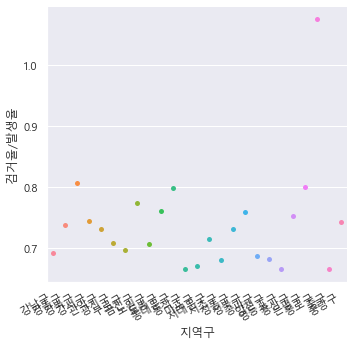

In [125]:
g=sns.catplot(x="지역구", y="검거율/발생율",kind='swarm',data=old_pop);
g.fig.autofmt_xdate()

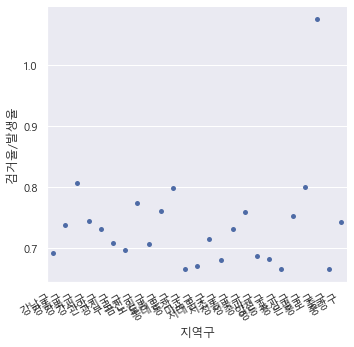

In [126]:
g=sns.catplot(x="지역구", y="검거율/발생율",kind='swarm',data=old_pop,color="#4E6BA6");
g.fig.autofmt_xdate()

<AxesSubplot:xlabel='지역구', ylabel='검거율/발생율'>

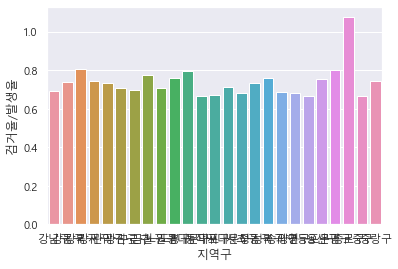

In [127]:
sns.barplot(data=old_pop,
  x="지역구",
  y="검거율/발생율",
  estimator=np.median)

C:\Users\ui\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



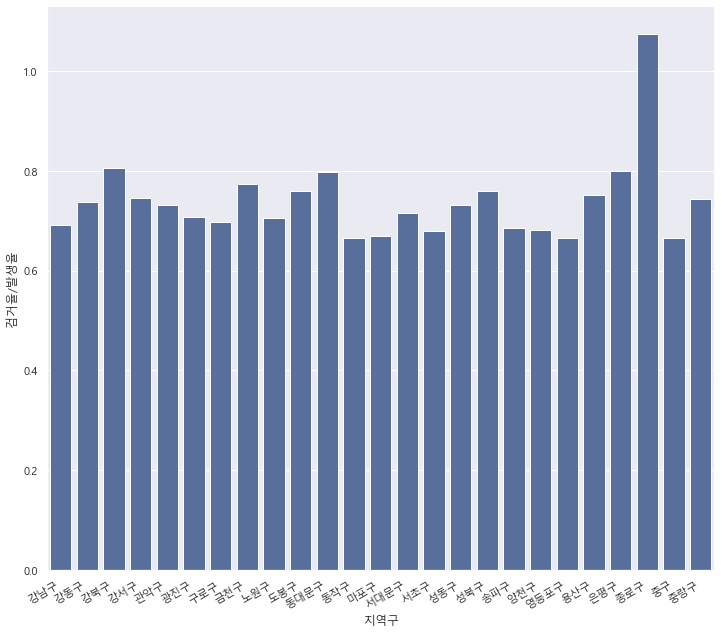

<Figure size 7200x7200 with 0 Axes>

In [128]:
g=sns.catplot(x="지역구", y="검거율/발생율",kind='bar',size=10,data=old_pop,color="#4E6BA6");
plt.figure(figsize = (100,100))
g.fig.autofmt_xdate()

C:\Users\ui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ui\anaconda3\lib\site-packages\seaborn\distributions.py:2065: FutureWarning:

Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 



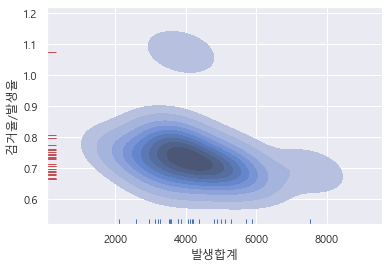

In [129]:
sns.kdeplot(old_pop["발생합계"],old_pop["검거율/발생율"],shade=True,color="#4E6BA6")
sns.rugplot(old_pop["발생합계"], color="b")
sns.rugplot(old_pop["검거율/발생율"], color="r", vertical=True);

C:\Users\ui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ui\anaconda3\lib\site-packages\seaborn\distributions.py:2065: FutureWarning:

Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 



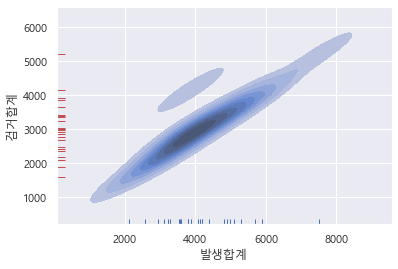

In [130]:
sns.kdeplot(old_pop["발생합계"],old_pop["검거합계"],shade=True,color="#4E6BA6")
sns.rugplot(old_pop["발생합계"], color="b")
sns.rugplot(old_pop["검거합계"], color="r", vertical=True);

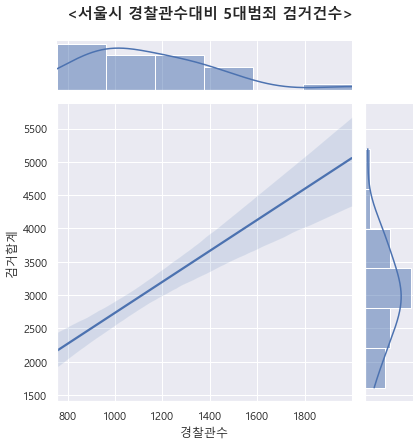

In [136]:

p=sns.jointplot(x=old_pop["경찰관수"],y=old_pop["검거합계"],kind="reg")
p.fig.suptitle('<서울시 경찰관수대비 5대범죄 검거건수>',fontweight="bold",fontsize=15, y=1.03)
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

In [137]:

old_pop = old_pop.sort_values(by='발생합계' ,ascending=False)

C:\Users\ui\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



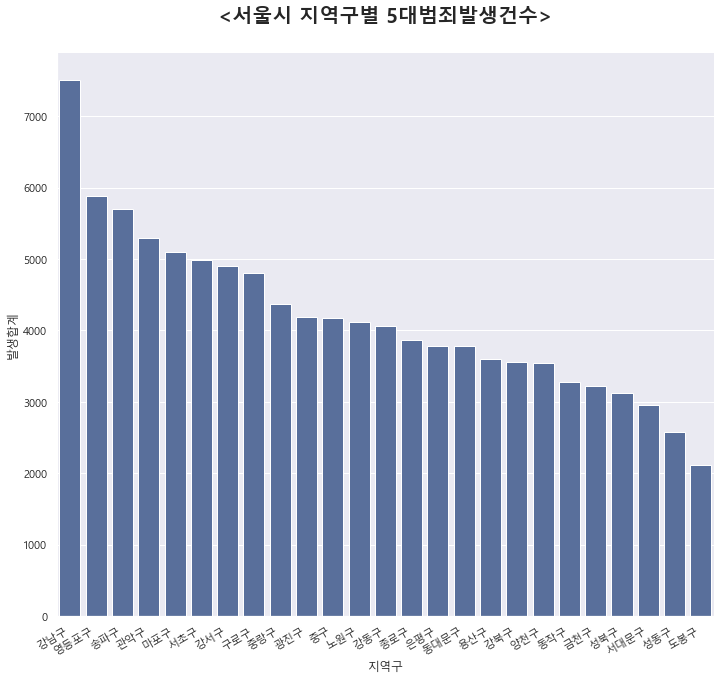

In [138]:

g=sns.catplot(x="지역구",y="발생합계",
            kind="bar",size=10,data=old_pop,color="#4E6BA6");
# g.set(title = "지역구당 연평균 범죄 발생 총수")
plt.title('<서울시 지역구별 5대범죄발생건수>',fontsize=20,pad=30,fontweight="bold")
g.fig.autofmt_xdate()

Text(0.5, 1.0, '<서울시 CCTV개수와 5대범죄발생건수>')

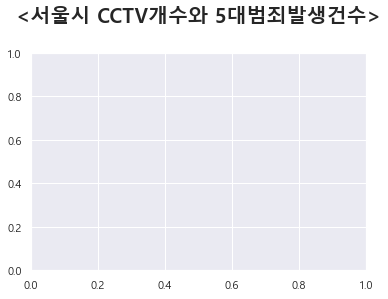

In [134]:
plt.title('<서울시 CCTV개수와 5대범죄발생건수>',fontsize=20,pad=30,fontweight="bold")
